In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
matplotlib.rcParams['figure.figsize'] = (12.75,8.5)

In [2]:
# Mazen only code
from google.colab import drive
drive.mount('/content/drive')

%cd 'drive/MyDrive/Concordia/SOEN 6611 - Measurements/Project'

ModuleNotFoundError: No module named 'google'

In [ ]:
# Reza only code
from google.colab import drive
drive.mount('/content/drive')

%cd 'drive/MyDrive'

In [25]:
df = pd.read_csv("./Unicorn_Companies.csv")
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


In [4]:
print(df.shape)
df.describe()

(1037, 13)


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
count,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037
unique,1035,200,623,46,256,33,1006,37,914,10,54,16,5
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,None,2015,None,None,10,1,None
freq,2,244,9,536,145,205,17,144,24,988,69,280,988


## Veracity

### Length of Big Data (Lbd)

In [5]:
Lbd = df.shape[0]
print('Lbd = ' + str(Lbd))

Lbd = 1037


### Number of Duplicates

In [6]:
bool_duplicates = df.duplicated(subset='Company', keep='first')
df[bool_duplicates]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
63,Bolt,$8.4,5/29/2018,Estonia,Tallinn,Auto & transportation,"Didi Chuxing, Diamler, TMT Investments",2013,$1.971B,None,28,5,None
976,Fabric,$1,10/26/2021,United States,New York,"Supply chain, logistics, & delivery","Innovation Endeavors, Aleph, Temasek",1999,None,None,1,1,None


In [7]:
display( df[df['Company'] == 'Bolt'] )
display( df[df['Company'] == 'Fabric'] )

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
37,Bolt,$11,10/8/2021,United States,San Francisco,Fintech,"Activant Capital, Tribe Capital, General Atlantic",2014,$963M,None,37,3,None
63,Bolt,$8.4,5/29/2018,Estonia,Tallinn,Auto & transportation,"Didi Chuxing, Diamler, TMT Investments",2013,$1.971B,None,28,5,None


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
578,Fabric,$1.5,2/24/2022,United States,Bellevue,E-commerce & direct-to-consumer,"Redpoint Ventures, Norwest Venture Partners, S...",2017,$292.58M,None,11,2,None
976,Fabric,$1,10/26/2021,United States,New York,"Supply chain, logistics, & delivery","Innovation Endeavors, Aleph, Temasek",1999,None,None,1,1,None


In [8]:
bool_duplicates = df.duplicated(keep='first')
num_dup = df[bool_duplicates].shape[0]
print('The number of duplicates = ' + str(num_dup))

The number of duplicates = 0


### Accuracy

In [9]:
def accuracy(Lbd, num_dup):
  Hmax = math.log(Lbd, 2)
  if num_dup == 0:
    Hacc = Hmax
  else:
    # Hacc(MDS) = log2(Lbd) – (1 / Lbd) x ∑j={1…k}pj log2 (pj)
    Hacc = math.log(Lbd, 2) - ((1 / Lbd) * num_dup * math.log(num_dup, 2)) # TODO change to adapt to separate datasets
  accuracy = Hacc / Hmax
  return accuracy

accuracy(Lbd, num_dup)

1.0

### Currentness

<AxesSubplot:>

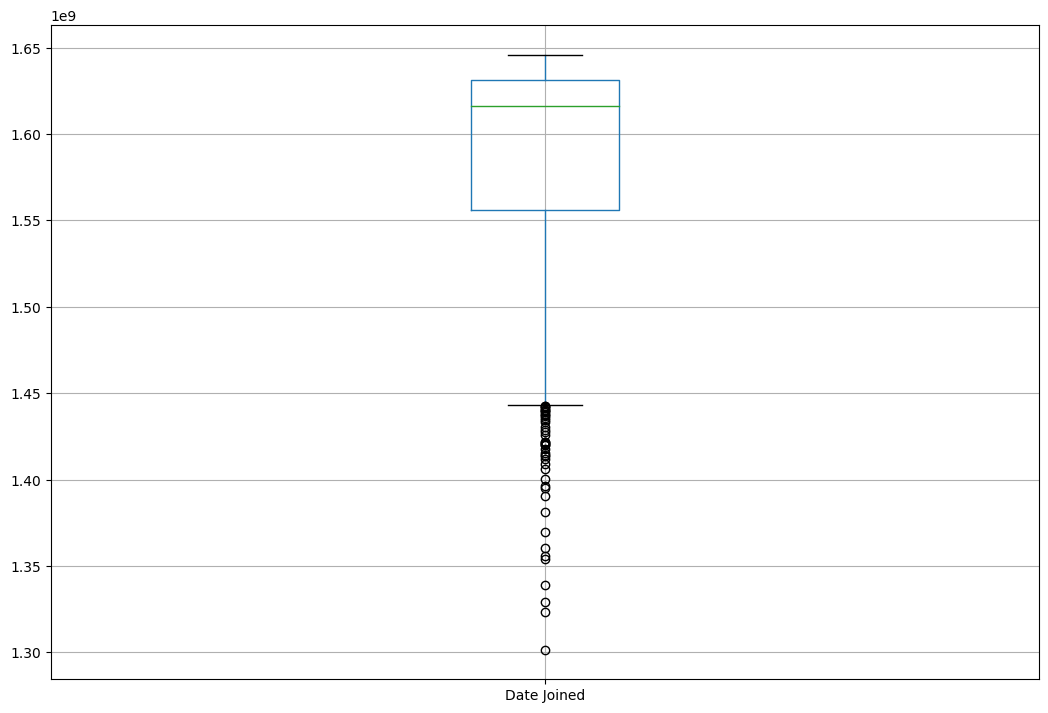

In [26]:
df["Date Joined"] = pd.to_datetime(df["Date Joined"]).astype('int64') // 10**9
df[df["Founded Year"] == "None"] = None
df["Founded Year"] = pd.to_datetime(df["Founded Year"]).astype('int64') // 10**9

df.boxplot(column =['Date Joined'])

In [58]:
def currentness(Lbd):
    quantiles = df.quantile([0.25, 0.5, 0.75])
    lower_quartile = quantiles.iloc[0]['Date Joined']
    upper_quartile = quantiles.iloc[2]['Date Joined']
    acceptable_age = df.shape[0] - (df[df['Date Joined'] < lower_quartile].shape[0] + df[df['Date Joined'] > upper_quartile].shape[0])
    currentness = acceptable_age / Lbd
    return currentness

currentness(Lbd)

0.5197685631629702

### Availability
Because the system is not deployed, we cannot know the number of successful requests and the total number of requests, so we will set availability to 0.

In [59]:
availability = 0

### Veracity

In [61]:
w_acc = 1/4
w_comp = 1/4
w_cur = 1/4
w_cur = 1/4

veracity = accuracy(Lbd, num_dup) * w_acc + completeness * w_comp + currentness(Lbd) * w_cur + availability * w_avail 

NameError: name 'completeness' is not defined